# Project - WildFire - (Fire Reason Predict)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%%capture
%run population.ipynb

In [2]:
fulldf = pd.read_csv('etl_filtered_v1.csv')

In [3]:
fulldf = fulldf.drop(['Unnamed: 0'],axis=1)

In [4]:
fulldf

FIRE_YEAR  DISCOVERY_DOY STAT_CAUSE_DESCR  STAT_CAUSE_CODE  CONT_DATE  \
0            2011             47   Debris Burning              5.0  2455608.5   
1            2011             47   Debris Burning              5.0  2455610.5   
2            2011             48            Arson              7.0  2455609.5   
3            2011             50            Arson              7.0  2455617.5   
4            2011             51   Debris Burning              5.0  2455625.5   
...           ...            ...              ...              ...        ...   
367739       2015             75    Miscellaneous              9.0        NaN   
367740       2015             95    Miscellaneous              9.0        NaN   
367741       2015             37    Miscellaneous              9.0        NaN   
367742       2015             89    Miscellaneous              9.0        NaN   
367743       2015             39    Miscellaneous              9.0        NaN   

        DISCOVERY_DATE  CONT_DOY  DISCOVERY_TIME  CONT_TIME  FIRE_SIZE  ...  \
0            2455608.5      47.0          1300.0     1530.0       26.0  ...   
1            2455608.5      49.0           820.0     1500.0       22.0  ...   
2            2455609.5      48.0          2030.0     2300.0      209.0  ...   
3            2455611.5      56.0          1800.0     1500.0      645.0  ...   
4            2455612.5      64.0          1500.0     1900.0      231.0  ...   
...                ...       ...             ...        ...        ...  ...   
367739       2457097.5       NaN             NaN        NaN        2.1  ...   
367740       2457117.5       NaN             NaN        NaN        1.0  ...   
367741       2457059.5       NaN             NaN        NaN        2.0  ...   
367742       2457111.5       NaN             NaN        NaN        2.0  ...   
367743       2457061.5       NaN             NaN        NaN        0.5  ...   

                  OWNER_DESCR  STATE    datetime  population_density  \
0                        USFS     AL  2011-02-16            7.572142   
1            STATE OR PRIVATE     AL  2011-02-16           31.442815   
2                        USFS     AL  2011-02-17            7.572142   
3            STATE OR PRIVATE     AL  2011-02-19           49.942890   
4                        USFS     AL  2011-02-20           49.942890   
...                       ...    ...         ...                 ...   
367739  MISSING/NOT SPECIFIED     VA  2015-03-16           33.568885   
367740  MISSING/NOT SPECIFIED     VA  2015-04-05           33.568885   
367741  MISSING/NOT SPECIFIED     VA  2015-02-06           38.354455   
367742  MISSING/NOT SPECIFIED     VA  2015-03-30           38.354455   
367743  MISSING/NOT SPECIFIED     VA  2015-02-08           74.304005   

       ELEVATION      AWND PRCP       TMAX       TMIN  distance  
0          100.6  8.062714  0.0  71.000000  32.000000  0.141421  
1          201.5  8.048481  0.0  76.942800  49.340830  0.100000  
2          100.6  8.064342  0.0  70.000000  33.000000  0.200000  
3          182.9  8.037152  0.0  66.000000  49.000000  0.282843  
4          189.0  8.042611  0.0  76.657125  49.084371  0.100000  
...          ...       ...  ...        ...        ...       ...  
367739     283.5  7.366097  0.0  61.000000  39.000000  0.100000  
367740     283.5  7.358285  0.0  57.000000  39.000000  0.100000  
367741     247.8  7.406834  0.0  70.218508  43.916184  0.100000  
367742     208.2  7.384267  0.0  69.862021  43.603630  0.141421  
367743     634.0  7.416477  0.0  57.000000  24.000000  0.100000  

[367744 rows x 24 columns]

<AxesSubplot:>

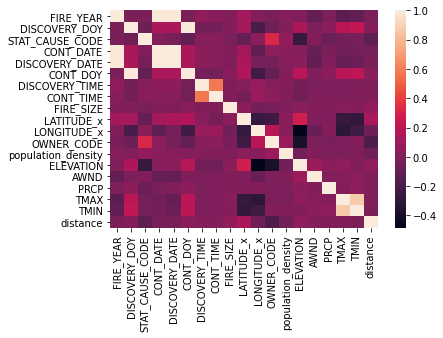

In [5]:
sns.heatmap(fulldf.corr())

In [6]:
column_names = fulldf.columns
column_names = column_names.str.lower()
fulldf.columns = column_names

In [7]:
#fulldf['month'] = pd.DatetimeIndex(fulldf['datetime']).month

# remove id or duplicate columns
fire_df = fulldf
fire_df = fire_df.dropna(subset=['cont_date','discovery_date','cont_time','discovery_time'])

def add(cd, dd, ct, dt):
    cont = (float(ct[:-2]) + float(ct[-2:])/60) / 24
    dist = (float(dt[:-2]) + float(dt[-2:])/60) / 24
    time = (cd+cont) - (dd+dist)
    return time

fire_df['fire_continue_days'] = fire_df.apply(lambda row : add(int(row['cont_date']), int(row['discovery_date']), str(row['cont_time']),str(row['discovery_time'])), axis = 1)
fire_df['tavg'] = (fire_df['tmax']+fire_df['tmin'])/2

parameters = ['fire_year', 'discovery_doy','stat_cause_descr', 'fire_continue_days', 
              'fire_size', 'latitude_x','longitude_x', 'owner_descr', 'state', 'population_density',
              'elevation', 'awnd', 'prcp', 'tavg']
fire_df = fire_df[parameters]

/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_97075/819151158.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_df['fire_continue_days'] = fire_df.apply(lambda row : add(int(row['cont_date']), int(row['discovery_date']), str(row['cont_time']),str(row['discovery_time'])), axis = 1)
/var/folders/fh/wcnnmg895s7gxj0vy72b0kq00000gn/T/ipykernel_97075/819151158.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_df['tavg'] = (fire_df['tmax']+fire_df['tmin'])/2


In [8]:
fire_df

fire_year  discovery_doy   stat_cause_descr  fire_continue_days  \
0            2011             47     Debris Burning            9.583333   
1            2011             47     Debris Burning           30.333333   
2            2011             48              Arson           11.250000   
3            2011             50              Arson           -6.500000   
4            2011             51     Debris Burning           29.666667   
...           ...            ...                ...                 ...   
367174       2015            102      Miscellaneous           15.750000   
367175       2015            216           Campfire           38.083333   
367176       2015            117           Campfire           15.875000   
367177       2015             84      Miscellaneous            2.916667   
367178       2015             90  Missing/Undefined            2.916667   

        fire_size  latitude_x  longitude_x       owner_descr state  \
0            26.0   32.777500   -87.145556              USFS    AL   
1            22.0   33.303611   -86.135278  STATE OR PRIVATE    AL   
2           209.0   32.853333   -87.377222              USFS    AL   
3           645.0   33.903333   -85.544167  STATE OR PRIVATE    AL   
4           231.0   33.545278   -85.873889              USFS    AL   
...           ...         ...          ...               ...   ...   
367174       13.2   39.272500   -77.754700               NPS    VA   
367175        1.4   37.381700   -79.925800               NPS    VA   
367176        0.1   39.321100   -77.711900               NPS    VA   
367177       12.0   36.669259   -75.971866               FWS    VA   
367178        8.0   36.635979   -75.993506               FWS    VA   

        population_density  elevation      awnd      prcp       tavg  
0                 7.572142      100.6  8.062714  0.000000  51.500000  
1                31.442815      201.5  8.048481  0.000000  63.141815  
2                 7.572142      100.6  8.064342  0.000000  51.500000  
3                49.942890      182.9  8.037152  0.000000  57.500000  
4                49.942890      189.0  8.042611  0.000000  62.870748  
...                    ...        ...       ...       ...        ...  
367174          479.346850      212.1  7.346880  0.000000  54.423598  
367175           77.290450      352.7  7.339222  0.000000  76.000000  
367176          479.346850      155.4  7.340437  0.030984  48.500000  
367177        -9999.000000        1.8  7.351171  0.000000  55.990728  
367178        -9999.000000        1.8  7.349347  0.050000  56.017130  

[255045 rows x 14 columns]

<AxesSubplot:>

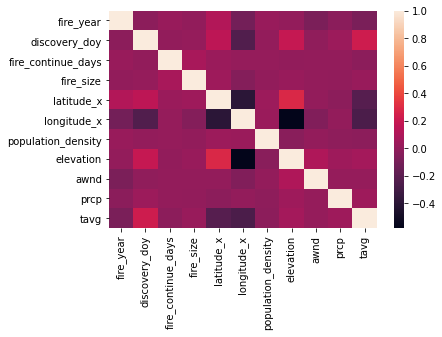

In [9]:
sns.heatmap(fire_df.corr())

  0%|                                                   | 0/805 [00:00<?, ?it/s]


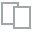
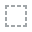
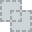
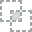
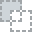
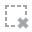
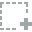
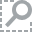
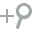
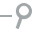
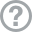
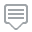
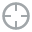
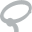
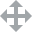
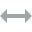
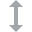
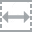
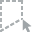
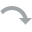
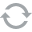
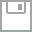
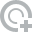
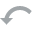
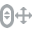
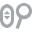
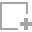
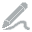
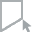
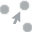
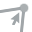
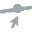

In [10]:
from dataprep.eda import plot
plot(fire_df)

In [11]:
# check duplicate
fire_df[fire_df.duplicated()]

fire_year  discovery_doy   stat_cause_descr  fire_continue_days  \
19700        2011            166          Lightning            0.000000   
47982        2015             50  Missing/Undefined            4.125000   
48108        2015            214  Missing/Undefined            3.333333   
52441        2013            319      Equipment Use            2.375000   
52698        2013            118      Equipment Use            1.208333   
...           ...            ...                ...                 ...   
327181       2015            129           Children            4.166667   
327439       2015             80      Miscellaneous            1.041667   
348909       2014            111      Miscellaneous            6.958333   
353388       2015            171              Arson            0.708333   
358918       2011             99              Arson            0.000000   

        fire_size  latitude_x  longitude_x            owner_descr state  \
19700        1.00   30.447778   -88.658889                    FWS    MS   
47982        0.25   30.990000   -91.110000                PRIVATE    LA   
48108        0.10   32.117850   -92.259010                PRIVATE    LA   
52441        0.10   44.821114   -69.264392  MISSING/NOT SPECIFIED    ME   
52698        0.10   43.944714   -70.461161  MISSING/NOT SPECIFIED    ME   
...           ...         ...          ...                    ...   ...   
327181       0.50   35.084783   -79.476616                PRIVATE    NC   
327439       0.10   35.871683   -81.611150                PRIVATE    NC   
348909       0.10   42.604500   -77.757700  MISSING/NOT SPECIFIED    NY   
353388       0.10   42.893600   -75.588100                PRIVATE    NY   
358918       0.10   34.856117   -94.997917                PRIVATE    OK   

        population_density  elevation      awnd  prcp       tavg  
19700            51.449695        4.0  8.048898   0.0  66.009764  
47982            62.498850       31.1  7.563183   0.0  64.894237  
48108            25.283470       21.3  7.506308   0.0  64.162157  
52441            19.097225       90.5  7.414049   0.0  34.500000  
52698           171.365400      135.0  7.508536   0.0  50.500000  
...                    ...        ...       ...   ...        ...  
327181           91.675060      110.0  7.381987   0.0  58.210949  
327439          110.655250      352.0  7.418439   0.0  48.500000  
348909           47.237485      195.9  6.260000   0.0  65.000000  
353388           19.149430      332.5  7.274315   0.0  50.857515  
358918            9.319501      203.3  8.114203   0.0  64.414869  

[173 rows x 14 columns]

In [12]:
# remove duplicate
fire_df = fire_df.drop_duplicates()

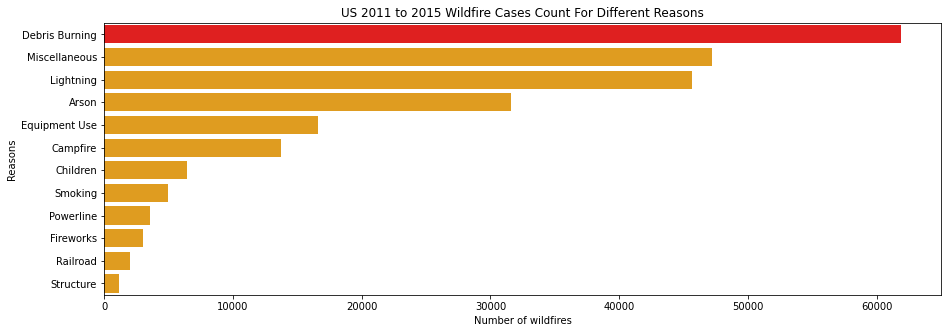

In [13]:
# remove Missing/Undefined reasons
fire_df = fire_df[fire_df['stat_cause_descr'] != 'Missing/Undefined']
reason_grouped = fire_df.groupby(['stat_cause_descr']).size().sort_values(ascending = False)

fig, ax = plt.subplots(figsize=(15,5))
clrs = ['orange' if (x < max(reason_grouped.values)) else 'red' for x in reason_grouped.values]
sns.barplot(y=reason_grouped.index, x=reason_grouped.values, orient = 'h', palette=clrs)
plt.ylabel('Reasons')
plt.xlabel('Number of wildfires')
plt.title('US 2011 to 2015 Wildfire Cases Count For Different Reasons')
plt.show()

In [14]:
fire_df = fire_df.dropna()
# save the un-encoded data for grouped classes predictions
fire_df2 = fire_df.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
categorical_cols = ['stat_cause_descr','owner_descr','state','fire_year'] 
fire_df[categorical_cols] = fire_df[categorical_cols].apply(lambda col: le.fit_transform(col))    

labels = np.array(fire_df['stat_cause_descr'])
fire_X= fire_df.drop(['stat_cause_descr'], axis = 1)
fire_X_list = list(fire_X.columns)
fire_X = np.array(fire_X)

In [16]:
fire_df['stat_cause_descr']

0         3
1         3
2         0
3         0
4         3
         ..
367173    4
367174    7
367175    1
367176    1
367177    7
Name: stat_cause_descr, Length: 237832, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fire_X, labels, test_size=0.25)

#from sklearn.preprocessing import MinMaxScaler
# define min max scaler
#scaler = MinMaxScaler()
# transform data
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6013488512899862


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, y_pred))
print('**************')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred))
print('**************')
print('ACCURACY')
print(accuracy_score(y_test, y_pred))

CONFUSION MATRIX
[[ 3952    68   112  2071   157    29   321  1142    20     2    27     5]
 [  137  1289    18   795    77     7   610   464     3     3    11     0]
 [  201    21   227   607    50    12    72   343     0     6    16     1]
 [ 1020   220    60 12026   279    33   398  1390    20    12    23     4]
 [  330    83    26  1170  1009    15   463  1037    27     8    15     2]
 [   47     9     8   145    35   325    79    95     5     1     4     0]
 [  187   145    10   485    75    12  9860   750    19     0    13     1]
 [  617   307    79  2406   367    42  1046  6749    27    11    54     3]
 [   60    11     6   330    85     8   125   196    65     0     6     1]
 [   29     7     6   185    20     1    48    60     1   128     4     0]
 [   78    38    13   373    61     3    72   484     3     4   115     0]
 [   28     0     5   128    12     5    21    57     2     0     0    10]]
**************
CLASSIFICATION REPORT
              precision    recall  f1-score  

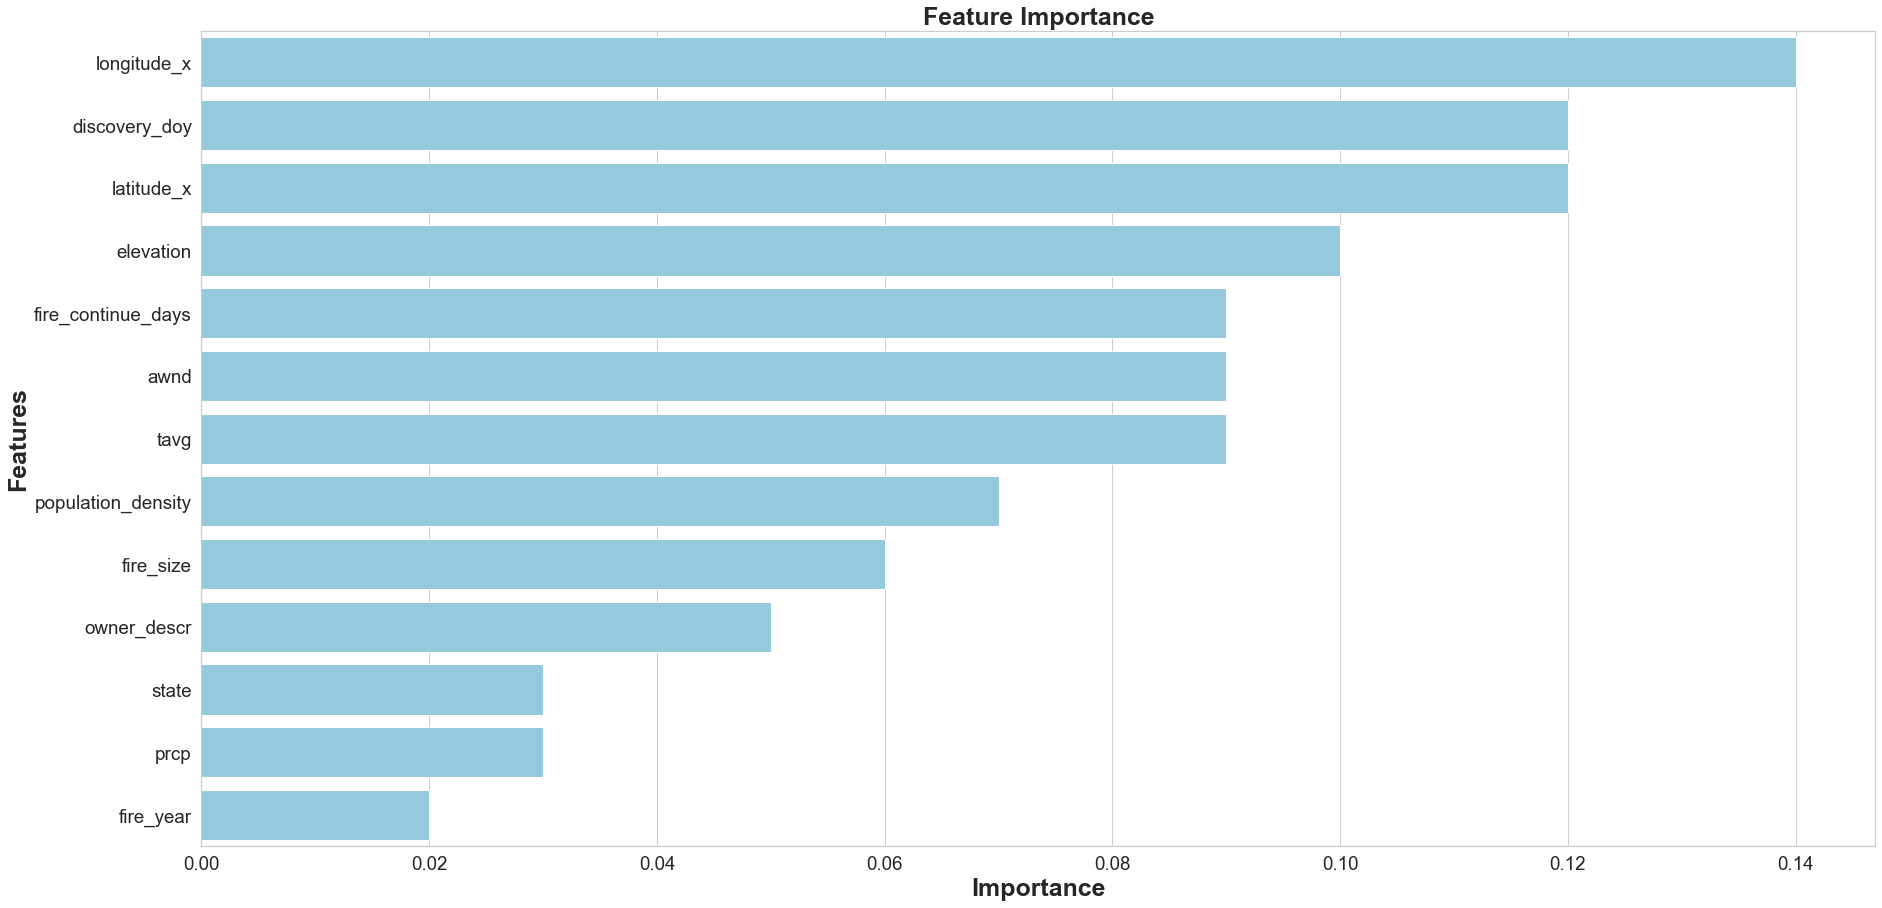

None

In [19]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fire_X_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
importances = pd.DataFrame(feature_importances)

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances[1], y=importances[0], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [20]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)

/Users/sarahhu/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/sarahhu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:53:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is: 0.5834875037841838


In [21]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
categorical_cols = ['owner_descr','state','fire_year'] 
fire_df2[categorical_cols] = fire_df2[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [22]:
def set_label(category):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Railroad','Fireworks','Powerline','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if category in natural:
        cause = 1
    elif category in accidental:
        cause = 2
    elif category in malicious:
        cause = 3
    else:
        cause = 4
    return cause
fire_df2['stat_cause_descr'] = fire_df2['stat_cause_descr'].apply(lambda x: set_label(x))
fire_df2 = fire_df2[fire_df2['stat_cause_descr'] != 4]
fire_df2.head()

fire_year  discovery_doy  stat_cause_descr  fire_continue_days  fire_size  \
0          0             47                 2            9.583333       26.0   
1          0             47                 2           30.333333       22.0   
2          0             48                 3           11.250000      209.0   
3          0             50                 3           -6.500000      645.0   
4          0             51                 2           29.666667      231.0   

   latitude_x  longitude_x  owner_descr  state  population_density  elevation  \
0   32.777500   -87.145556           15      1            7.572142      100.6   
1   33.303611   -86.135278           12      1           31.442815      201.5   
2   32.853333   -87.377222           15      1            7.572142      100.6   
3   33.903333   -85.544167           12      1           49.942890      182.9   
4   33.545278   -85.873889           15      1           49.942890      189.0   

       awnd  prcp       tavg  
0  8.062714   0.0  51.500000  
1  8.048481   0.0  63.141815  
2  8.064342   0.0  51.500000  
3  8.037152   0.0  57.500000  
4  8.042611   0.0  62.870748

In [23]:
labels = np.array(fire_df2['stat_cause_descr'])
fire_X= fire_df2.drop(['stat_cause_descr'], axis = 1)
fire_X_list = list(fire_X.columns)
fire_X = np.array(fire_X)

In [24]:
fire_df2['stat_cause_descr']

0         2
1         2
2         3
3         3
4         2
         ..
367171    1
367172    2
367173    2
367175    2
367176    2
Name: stat_cause_descr, Length: 190640, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fire_X, labels, test_size=0.25)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8079311791859001


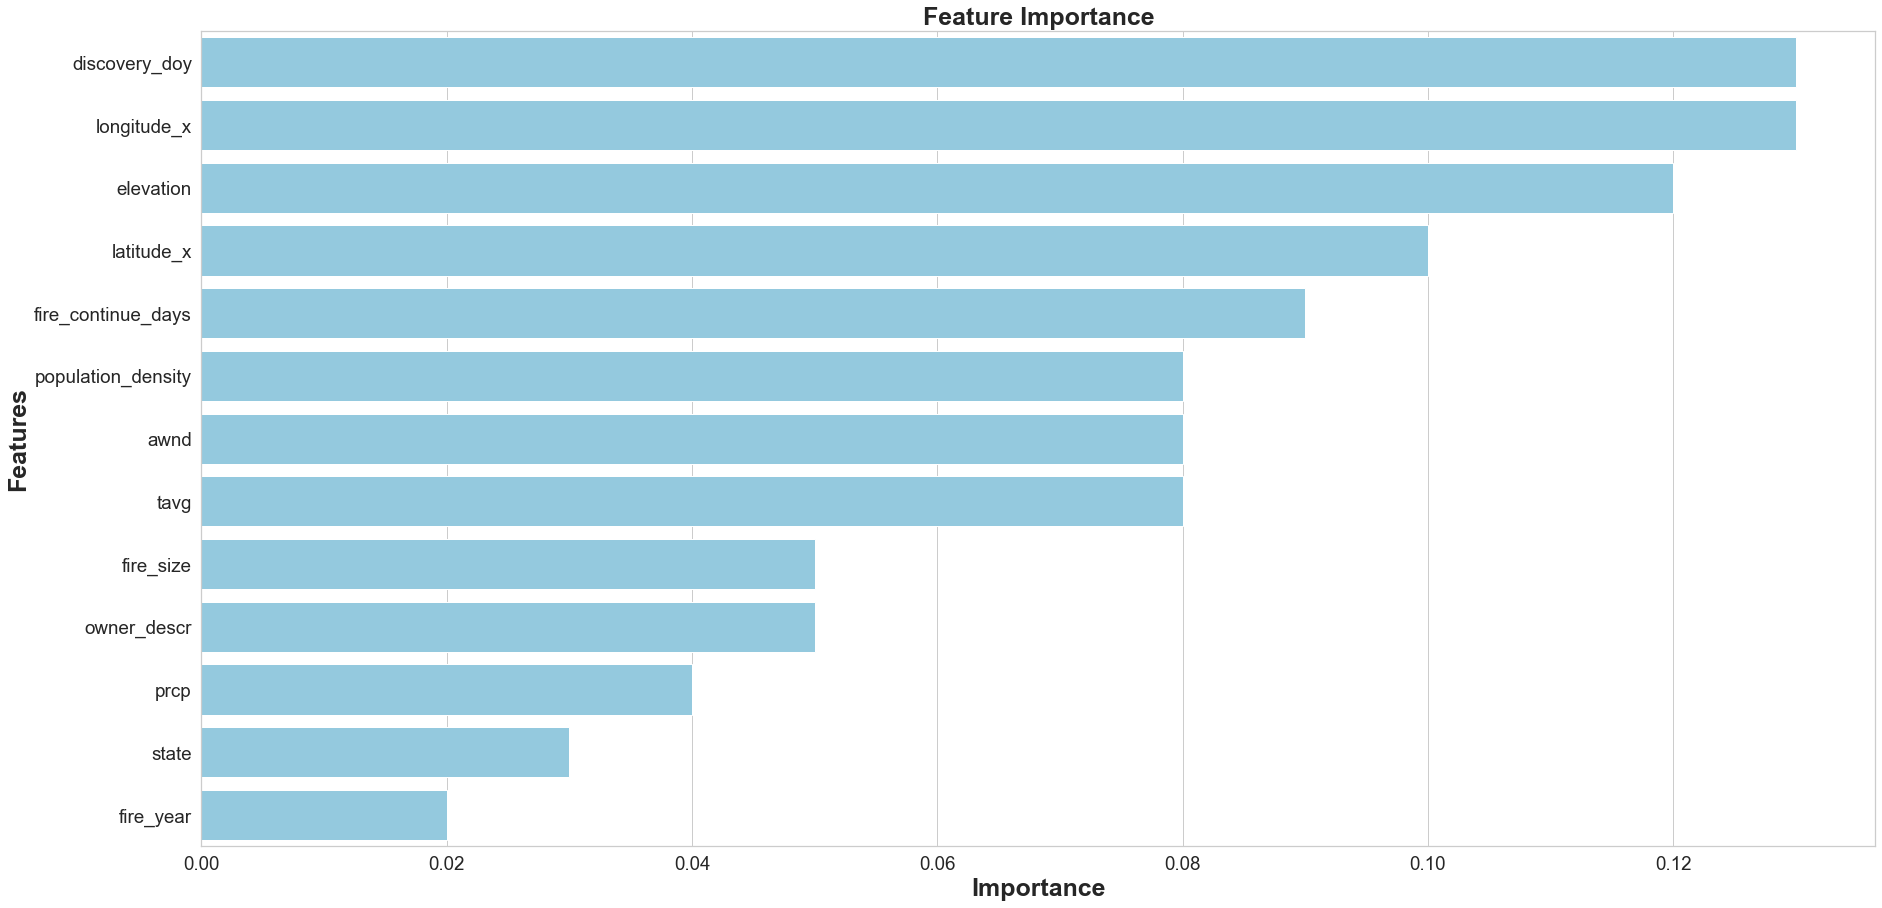

None

In [26]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(fire_X_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
importances = pd.DataFrame(feature_importances)

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances[1], y=importances[0], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())

In [41]:
str(['natural','accidental','malicious'])

"['natural', 'accidental', 'malicious']"

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.00366619 to fit


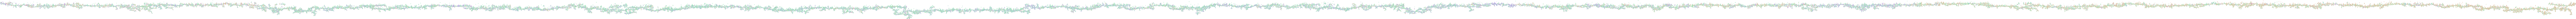

In [46]:
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = None,
                class_names = ['natural','accidental','malicious'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Try if PCA will help to get higher accuracy

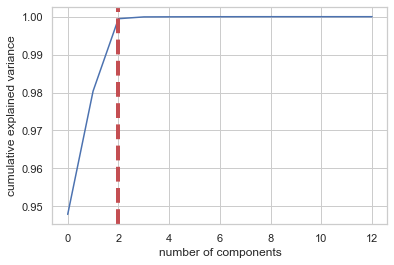

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.947848              9.478477e-01
1                   0.980366              3.251885e-02
2                   0.999473              1.910677e-02
3                   0.999943              4.699409e-04
4                   0.999964              2.107230e-05
5                   0.999980              1.556724e-05
6                   0.999990              1.029527e-05
7                   0.999997              7.189502e-06
8                   0.999999              1.261617e-06
9                   1.000000              9.661083e-07

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=13)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=2, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [29]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
clf=RandomForestClassifier(n_estimators=1000)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_pca, y_train)
y_pred=clf.predict(X_test_pca)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6716743600503567
